In [52]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime, random
import matplotlib.dates as mdates

def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h), int(m), int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

y1  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 1.txt")
y2  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 2.txt")
y3  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 3.txt")
y4  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 4.txt")
y5  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 5.txt")
y6  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 6.txt")
y7  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 7.txt")
y8  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 8.txt")
y9  = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 9.txt")
y10 = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags 10.txt")
y11 = MakeDataFromText("Yoel 4th/Cold weather Run by Yoel 4th Feb/tags.txt")

# Combine all data into one dictionary
combined = dict()
for d in [ y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11 ]:
    for k,v in d.items():
        if k in combined:                                 # if tag is already in dict
            for i in range(len(v[0])):                    # iterate over all time points
                if v[0][i] in combined[k]:                # if time point is already in dict
                    combined[k][v[0][i]].append(v[1][i])
                else:                                     # if time point is not in dict
                    combined[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]
for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2) # avg all points taken during the same second

In [53]:
shirt_inner = {
    "9C54" : "Inner BN", # Shirt 15
    "9968" : "Inner B",
    "65E1" : "Inner C",
    "5E23" : "Inner Ab L",
    "ACB3" : "Inner Ab R",
    "7AD3" : "Inner AUR",
    "99A1" : "Inner ALR",
    "B19D" : "Inner ALL",
    "43C6" : "Inner AUL",
}

shirt_outer = {
    "71BB" : "Outer BN",  # Shirt 6
    "7705" : "Outer B", 
    "B25E" : "Outer C", 
    "3247" : "Outer Ab L", 
    "A9B5" : "Outer Ab R",
    "6C38" : "Outer AUR",
    "7662" : "Outer ALR", 
    "A983" : "Outer ALL", 
    "098F" : "Outer AUL",
}

shirt_mark_inner = {
    "9C54" : "o", # Shirt 15
    "9968" : "v",
    "65E1" : "^",
    "5E23" : "1",
    "ACB3" : "8",
    "7AD3" : "s",
    "99A1" : "p",
    "B19D" : "*",
    "43C6" : "d",
}

shirt_mark_outer = {
    "71BB" : "o", # Shirt 6
    "7705" : "v",
    "B25E" : "^",
    "3247" : "1",
    "A9B5" : "8",
    "6C38" : "s",
    "7662" : "p",
    "A983" : "*",
    "098F" : "d",
}

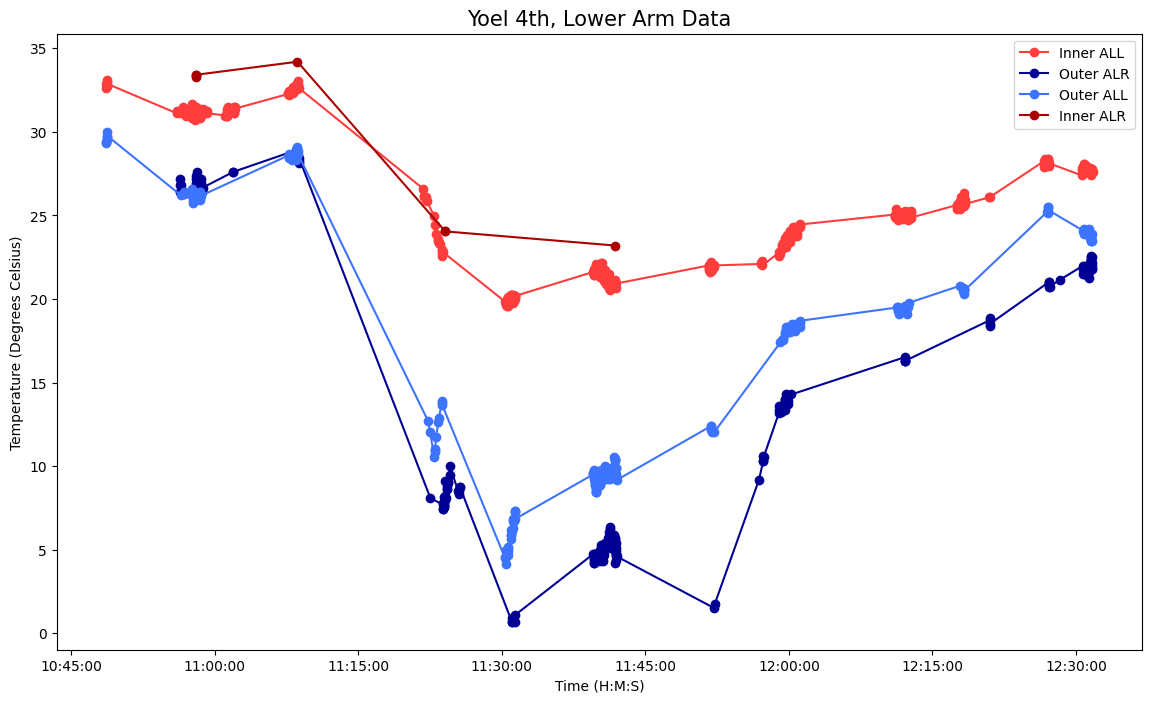

In [54]:
myFmt = mdates.DateFormatter('%H:%M:%S')
fig, ax = plt.subplots(figsize=(14, 8))
ax.xaxis.set_major_formatter(myFmt)


for k,v in combined.items():
    epc = k[-4:]
    s = sorted( v.items() )

    time = [ j[0] for j in s ]
    data = [ j[1] for j in s ]

    # time = [ j[0] for j in s if j[0]<datetime.datetime(1970, 2, 1, 14, 0, 0) ]
    # data = [ j[1] for j in s if j[0]<datetime.datetime(1970, 2, 1, 14, 0, 0) ]

    # if epc in shirt_inner.keys():
    #     ax.plot(time, data, label=shirt_inner[epc], marker=shirt_mark_inner[epc], color="#ab0000")
    
    # if epc in shirt_outer.keys():
    #     ax.plot(time, data, label=shirt_outer[epc], marker=shirt_mark_outer[epc], color="#020094")

    # INNER
    if epc == "99A1":
        ax.plot(time, data, label=shirt_inner[epc], marker="o", color="#ab0000")
    
    if epc == "B19D":
        ax.plot(time, data, label=shirt_inner[epc], marker="o", color="#ff3d3d")

    # # OUTER
    if epc == "7662":
        ax.plot(time, data, label=shirt_outer[epc], marker="o", color="#020094")
    
    if epc == "A983":
        ax.plot(time, data, label=shirt_outer[epc], marker="o", color="#3d74ff")


ax.set_title("Yoel 4th, Lower Arm Data", fontsize=15)
ax.set_xlabel("Time (H:M:S)")
ax.set_ylabel("Temperature (Degrees Celsius)")
ax.legend()